# NIPALS

- *Auteurs :* Quentin Grimonprez, Cristian Preda, Vincent Vandewalle
- *Date :* 3 février 2020

In [63]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from sklearn.decomposition import PCA

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = 8, 8
rng = np.random.default_rng(42)  # fixer le seed de l'aléatoire

## Simulation des données

In [64]:
n = 100
p = 4
mu = np.array([1, 2, 4, 3])
cov = np.array([
    [0.7, 0, 1.3, 0.5],
    [0, 1.2, -0.3, -0.1],
    [1.3, -0.3, 3.1, 1.3],
    [0.5, -0.1, 1.3, 0.6]
])

In [65]:
X = rng.multivariate_normal(mu, cov, n)
X[:10, ]

array([[1.23188337, 3.14347085, 3.38747085, 2.78091498],
       [2.68390863, 3.01394039, 7.49967134, 4.42190575],
       [1.47854511, 2.8752649 , 3.94930934, 2.96519088],
       [0.88652465, 0.7900847 , 3.87468799, 2.70999804],
       [1.15626546, 3.07337384, 3.34086297, 2.58239614],
       [1.63844708, 2.6526894 , 4.28874731, 2.89878903],
       [1.57275728, 2.27116509, 4.70553025, 3.26809815],
       [1.31399837, 1.54228126, 3.15422406, 2.2028122 ],
       [1.77750098, 2.74133885, 4.80741826, 3.42503327],
       [0.97545041, 2.90650781, 4.23619526, 3.35994645]])

Taille de X

In [66]:
X.shape

(100, 4)

On vérifie que les données sont "bien" simulées :
- Les moyennes:

X étant un objet de class ndarray, il dispose de méthodes: `mean`, `std`, ... mais on peut également utiliser les fonctions `np.mean`, `np.std`, ... qui peuvent s'appliquer à plusieurs types d'objets: ndarray, list, dataframe...

In [67]:
X.mean(axis=0)  # axis=0: par colonne, axis=1: par ligne

array([1.05906072, 2.07754193, 4.04868361, 3.01170916])

In [68]:
np.mean(X, axis=0)

array([1.05906072, 2.07754193, 4.04868361, 3.01170916])

In [69]:
np.round(np.mean(X, axis=0), 2)

array([1.06, 2.08, 4.05, 3.01])

- La matrice de variance-covariance :

In [70]:
np.round(np.cov(X, rowvar=False), 2)

array([[ 0.68, -0.09,  1.24,  0.46],
       [-0.09,  1.12, -0.44, -0.14],
       [ 1.24, -0.44,  2.98,  1.21],
       [ 0.46, -0.14,  1.21,  0.53]])

## ACP normée sur les données simulées.


La méthode std de numpy permet de calculer l'écart-type. L'estimateur biaisé ($\sqrt{1/n}$) est utilisé par défaut, à l'inverse de R qui utilise l'estimateur non biaisé par défaut ($\sqrt{1/(n-1)}$). Le paramètre `ddof` permet de choisir l'estimateur; `ddof=0` pour le biaisé, `ddof=1` pour le non-biaisé.

In [71]:
sd = X.std(axis=0, ddof=0)
X_scaled = X / sd
X_scaled[:10, ]

array([[1.50473599, 2.97966599, 1.97091461, 3.83947684],
       [3.27837359, 2.85688531, 4.36349491, 6.10511464],
       [1.80603139, 2.72543614, 2.29780619, 4.0938978 ],
       [1.08288299, 0.74891374, 2.25438963, 3.74156521],
       [1.41236929, 2.91322171, 1.94379699, 3.56539133],
       [2.00135041, 2.51445895, 2.49529962, 4.00221993],
       [1.92111083, 2.1528157 , 2.73779428, 4.51210744],
       [1.60503882, 1.46191368, 1.83520584, 3.04131788],
       [2.17120366, 2.59848891, 2.79707525, 4.72878029],
       [1.19150511, 2.75505099, 2.46472353, 4.63891801]])

La fonction `np.cov` n'a pas le même comportement par défaut (`ddof=1`).

In [72]:
np.cov(X_scaled, rowvar=False, ddof=0)

array([[ 1.        , -0.10388285,  0.87476038,  0.77471904],
       [-0.10388285,  1.        , -0.23970501, -0.18348252],
       [ 0.87476038, -0.23970501,  1.        ,  0.96219283],
       [ 0.77471904, -0.18348252,  0.96219283,  1.        ]])

In [73]:
pca = PCA(n_components=2)

In [74]:
pca.fit(X_scaled)

PCA(n_components=2)

- valeurs propres

In [75]:
pca.explained_variance_

array([2.82415221, 0.96655006])

- facteurs principaux

In [76]:
pca.components_

array([[-0.54407827,  0.16875229, -0.59263506, -0.56946044],
       [ 0.18040406,  0.97972749,  0.03806101,  0.0783567 ]])

- composantes principales

In [77]:
comp = pca.transform(X_scaled)
comp[:10, :]

array([[ 0.46509805,  0.98837386],
       [-3.2287372 ,  1.45664559],
       [-0.08034218,  0.8260302 ],
       [ 0.20593412, -1.27014213],
       [ 0.67629184,  0.88410469],
       [-0.28704851,  0.65489962],
       [-0.73849162,  0.33529494],
       [ 0.68934701, -0.54822109],
       [-0.95787193,  0.83628506],
       [-0.15028273,  0.79324069]])

In [78]:
pca.fit_transform(X_scaled)

array([[ 0.46509805,  0.98837386],
       [-3.2287372 ,  1.45664559],
       [-0.08034218,  0.8260302 ],
       [ 0.20593412, -1.27014213],
       [ 0.67629184,  0.88410469],
       [-0.28704851,  0.65489962],
       [-0.73849162,  0.33529494],
       [ 0.68934701, -0.54822109],
       [-0.95787193,  0.83628506],
       [-0.15028273,  0.79324069],
       [ 1.31926884, -0.73248642],
       [ 0.17945407, -0.30861595],
       [ 1.13187087, -0.21090846],
       [-2.34477831,  0.37277604],
       [-0.52806217, -1.6098275 ],
       [-2.8984837 ,  0.44069909],
       [ 1.31864749, -0.99492972],
       [ 1.71874839, -0.01306557],
       [-1.62310588, -0.49803466],
       [-0.68117389, -0.20406301],
       [ 0.91604224,  0.54204298],
       [-1.99209349, -0.48026927],
       [ 0.84339532, -0.58995869],
       [-0.42849695, -0.01204923],
       [-2.10715103,  1.0721854 ],
       [-0.69840115, -1.39192427],
       [-1.45951328,  0.19888295],
       [ 1.49763451,  1.63191869],
       [-0.86953358,

Scikit-learn ne propose pas de fonctions graphiques pour l'ACP. Nous écrivons donc ces fonctions.

In [79]:
def plot_explained_variance(pca, cumulative=False):
    _, ax = plt.subplots()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    if cumulative:
        cumul_ratio = np.cumsum(pca.explained_variance_ratio_)
        ax.bar(range(len(cumul_ratio) + 1), np.concatenate(([0], cumul_ratio)))
        ax.set_ylabel("Cumulative explained variance ratio")
        ax.set_title("Cumulative explained variance ratio")
    else:
        ax.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
        ax.set_ylabel("Explained variance ratio")
        ax.set_title("Explained variance ratio")

    ax.set_xlabel("Number of components")

    return ax


def plot_individuals(score, comp=[0, 1]):
    _, ax = plt.subplots()
    ax.axhline(y=0, color="k", lw=1, ls="--")
    ax.axvline(x=0, color="k", lw=1, ls="--")
    ax.scatter(score[:, comp[0]], score[:, comp[1]])
    ax.set_xlabel("Dim " + str(comp[0]))
    ax.set_ylabel("Dim " + str(comp[1]))
    ax.set_title("PCA graph of individuals")

    return ax


def get_var_contribution(pca):
    return pca.components_ * np.sqrt(pca.explained_variance_[:pca.n_components_]).reshape(-1, 1)


def plot_variables(pca, comp=[0, 1], label=None):
    _, ax = plt.subplots()

    if label is None:
        label = ["V" + str(i) for i in range(pca.n_features_in_)]

    var_contrib = get_var_contribution(pca)

    # plot circle + axis
    an = np.linspace(0, 2 * np.pi, 100)
    ax.plot(np.cos(an), np.sin(an), color="k")
    ax.axhline(y=0, color="k", lw=1, ls="--")
    ax.axvline(x=0, color="k", lw=1, ls="--")

    # plot arrow + text
    for i in range(pca.n_features_in_):
        ax.arrow(0, 0,
                 var_contrib[comp[0], i], var_contrib[comp[1], i],
                 head_width=0.01, head_length=0.01)

        ax.text(var_contrib[comp[0], i] + 0.025,
                var_contrib[comp[1], i] + 0.025,
                label[i])

    ax.set_xlabel("Dim " + str(comp[0]) + " (" + str(round(pca.explained_variance_ratio_[comp[0]] * 100, 2)) + "%)")
    ax.set_ylabel("Dim " + str(comp[1]) + " (" + str(round(pca.explained_variance_ratio_[comp[1]] * 100, 2)) + "%)")
    ax.set_title("PCA graph of variables")

    return ax

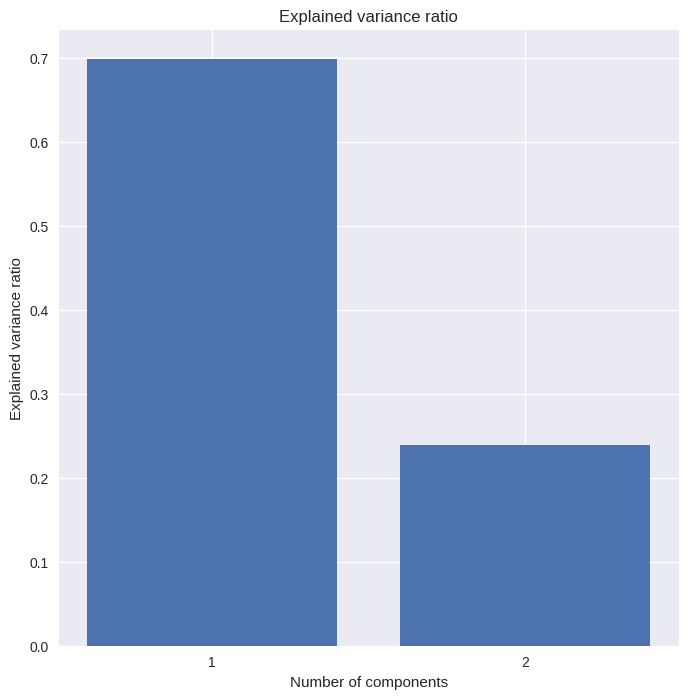

In [80]:
plot_explained_variance(pca, cumulative=False)
plt.show()

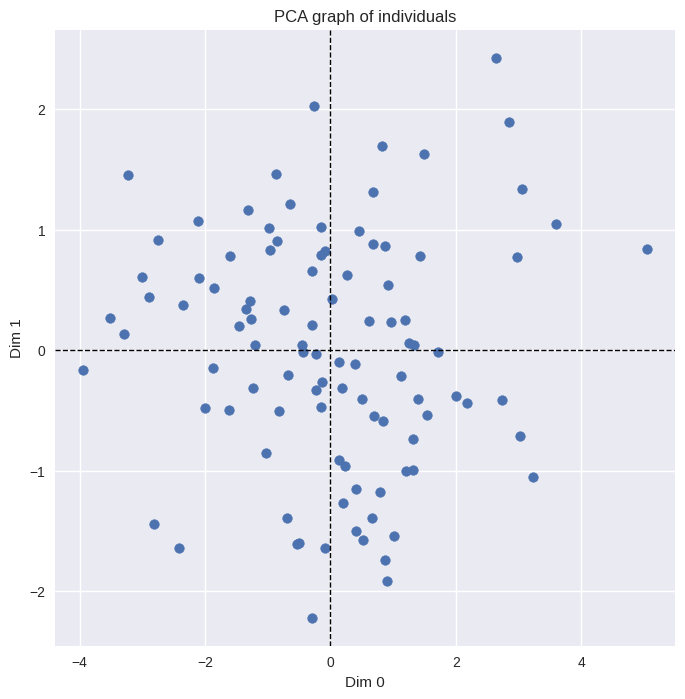

In [81]:
plot_individuals(comp, [0, 1])
plt.show()

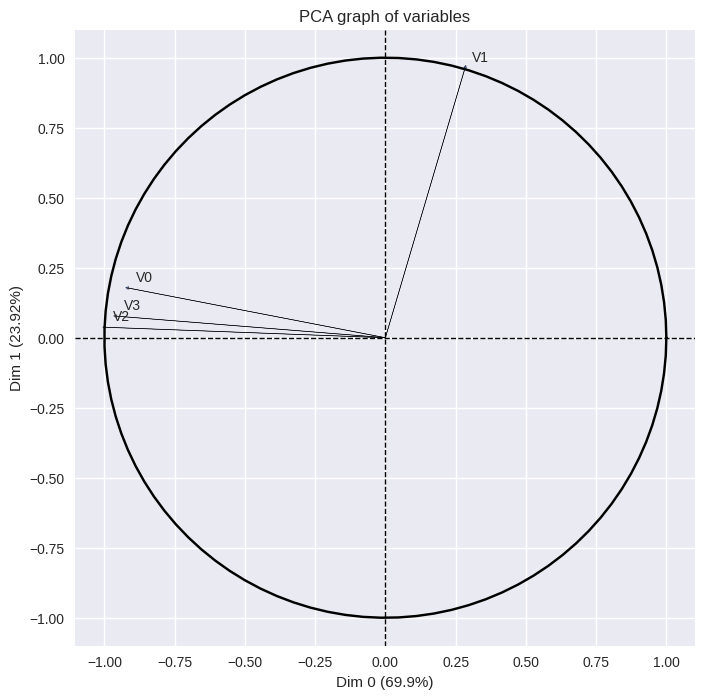

In [82]:
plot_variables(pca)
plt.show()

### ACP normée

Faire plus directement une ACP normée grâce aux pipelines. Les pipelines permettent de chaîner des transformeurs (comme PCA) et optionnellement un estimateur final. En faisant un fit d'une pipeline, on applique le fit de la 1ère étape avec les données d'entrées puis on applique le fit de la 2ème étape avec le résultat du transform de la 1ère étape et ainsi de suite.

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

On fait 2 étapes:

1) on réduit nos données
2) on applique une ACP

In [84]:
scaled_PCA = Pipeline(steps=[("scaler", StandardScaler()), ("pca", PCA())])

In [85]:
scaled_PCA.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [86]:
pc_pipeline = scaled_PCA.transform(X)
pc_pipeline[:10]

array([[ 0.46509805,  0.98837386, -0.3289216 ,  0.11656863],
       [-3.2287372 ,  1.45664559,  0.03060112, -0.04301417],
       [-0.08034218,  0.8260302 , -0.37987793,  0.09327031],
       [ 0.20593412, -1.27014213, -0.21036512, -0.13251822],
       [ 0.67629184,  0.88410469, -0.43108578, -0.03473332],
       [-0.28704851,  0.65489962, -0.57269607, -0.0512197 ],
       [-0.73849162,  0.33529494, -0.19740539,  0.04481167],
       [ 0.68934701, -0.54822109, -1.04192394, -0.10552004],
       [-0.95787193,  0.83628506, -0.2132364 ,  0.15554989],
       [-0.15028273,  0.79324069,  0.45510558,  0.10950964]])

In [87]:
comp[:10, ]

array([[ 0.46509805,  0.98837386],
       [-3.2287372 ,  1.45664559],
       [-0.08034218,  0.8260302 ],
       [ 0.20593412, -1.27014213],
       [ 0.67629184,  0.88410469],
       [-0.28704851,  0.65489962],
       [-0.73849162,  0.33529494],
       [ 0.68934701, -0.54822109],
       [-0.95787193,  0.83628506],
       [-0.15028273,  0.79324069]])

## NIPALS

### NIPALS sans traitement des données manquantes

In [88]:
def NIPALS(X, h=2, iter=100):
    # renvoie les composantes principales (CP), les facteurs principaux (FP) et les données reconstituées avec h composantes (Xrec)
    n, p = X.shape

    # centrer et réduire matrice X
    m = X.mean(axis=0)
    s = X.std(axis=0, ddof=0)
    X_reduit = (X - m) / s

    # on réserve la place pour:
    CP = np.zeros((n, h))  # les composantes principales
    FP = np.zeros((h, p))  # les facteurs principaux
    X_recons = np.zeros((n, p))  # les données reconstituées

    # déroulement de l'algorithme:
    for i in range(h):
        # voir pages 30-32 du cours
        cp, fp = calcul_cp_fp(X_reduit, iter)  # fonction qui calcule la 1ere comp. princ et 1er fact. principal
        CP[:, i] = cp
        FP[i, :] = fp
        X_reduit -= np.matmul(cp.reshape(-1, 1), fp.reshape(1, -1))

    # Reconstitution des données avec h composantes
    X_recons = np.matmul(CP, FP)
    X_recons *= s
    X_recons += m

    return CP, FP, X_recons


def calcul_cp_fp(X, iter=100):
    cp = X[:, 0].copy()  # important ici: on crée une copie de la colonne sz X, sinon la colonne de X sera modifiée directement
    for i in range(iter):
        fp = np.matmul(X.T, cp)

        # on normalize fp:
        fp /= np.sqrt(np.sum(fp**2))
        cp = np.matmul(X, fp)

    return cp, fp

### Application de NIPALS aux données simulées
Voici ce qu'on obtient avec h=4 composantes. À comparer avec ce qui est donné par scikit-learn dans l'objet 'pca'.

In [89]:
cp, fp, X_rec = NIPALS(X, h=p)

Les facteurs principaux :
- nipals

In [90]:
fp

array([[ 0.54407827, -0.16875229,  0.59263506,  0.56946044],
       [ 0.18040406,  0.97972749,  0.03806101,  0.0783567 ],
       [ 0.77938323, -0.0892577 , -0.16706563, -0.5972302 ],
       [ 0.25297231, -0.06074344, -0.78703502,  0.55936671]])

- scikit-learn

In [91]:
pca.components_

array([[-0.54407827,  0.16875229, -0.59263506, -0.56946044],
       [ 0.18040406,  0.97972749,  0.03806101,  0.0783567 ]])

Les composantes principales :
- nipals

In [92]:
cp[:6, :]

array([[-0.46509805,  0.98837386,  0.3289216 ,  0.11656863],
       [ 3.2287372 ,  1.45664559, -0.03060112, -0.04301417],
       [ 0.08034218,  0.8260302 ,  0.37987793,  0.09327031],
       [-0.20593412, -1.27014213,  0.21036512, -0.13251822],
       [-0.67629184,  0.88410469,  0.43108578, -0.03473332],
       [ 0.28704851,  0.65489962,  0.57269607, -0.0512197 ]])

- scikit-learn

In [93]:
comp[:6, :]

array([[ 0.46509805,  0.98837386],
       [-3.2287372 ,  1.45664559],
       [-0.08034218,  0.8260302 ],
       [ 0.20593412, -1.27014213],
       [ 0.67629184,  0.88410469],
       [-0.28704851,  0.65489962]])

#### La reconstitution complète des données (toutes les composantes principales) 

La reconstitution des données avec toutes les composantes principales.
- Données reconstituées

In [94]:
X_rec[:6, :]

array([[1.23188337, 3.14347085, 3.38747085, 2.78091498],
       [2.68390863, 3.01394039, 7.49967134, 4.42190575],
       [1.47854511, 2.8752649 , 3.94930934, 2.96519088],
       [0.88652465, 0.7900847 , 3.87468799, 2.70999804],
       [1.15626546, 3.07337384, 3.34086297, 2.58239614],
       [1.63844708, 2.6526894 , 4.28874731, 2.89878903]])

- Données

In [95]:
X[:6, :]

array([[1.23188337, 3.14347085, 3.38747085, 2.78091498],
       [2.68390863, 3.01394039, 7.49967134, 4.42190575],
       [1.47854511, 2.8752649 , 3.94930934, 2.96519088],
       [0.88652465, 0.7900847 , 3.87468799, 2.70999804],
       [1.15626546, 3.07337384, 3.34086297, 2.58239614],
       [1.63844708, 2.6526894 , 4.28874731, 2.89878903]])

#### Approximation des données avec quelques composantes (ici h=2)

Voici la reconstitution des données avec juste deux composantes :

In [96]:
cp, fp, X_rec = NIPALS(X, h=2)

- Données reconstituées

In [97]:
X_rec[:6, :]

array([[0.99787074, 3.18191365, 3.63960016, 2.87596954],
       [2.71234221, 3.00830238, 7.4326992 , 4.42609564],
       [1.21684447, 2.91701296, 4.18455463, 3.09172691],
       [0.77974411, 0.80140151, 3.75583487, 2.85468521],
       [0.88840092, 3.11174104, 3.41766147, 2.78294344],
       [1.28364127, 2.70333478, 4.38390676, 3.16727224]])

- Données

In [98]:
X[:6, :]

array([[1.23188337, 3.14347085, 3.38747085, 2.78091498],
       [2.68390863, 3.01394039, 7.49967134, 4.42190575],
       [1.47854511, 2.8752649 , 3.94930934, 2.96519088],
       [0.88652465, 0.7900847 , 3.87468799, 2.70999804],
       [1.15626546, 3.07337384, 3.34086297, 2.58239614],
       [1.63844708, 2.6526894 , 4.28874731, 2.89878903]])

## NIPALS avec données manquantes.
L'algorithme précédent est adapté aux cas où il n'y a pas de données manquantes. Les points à modifier sont au niveau du :

  - calcul des moyennes (m) et écart-types (s)
  - calcul des composantes et facteurs dans la fonction calcul_cp_fp

On ré-écrit donc ces fonctions en les renommant : *NIPALS_dm* et *calcul_cp_fp_dm*

In [99]:
def NIPALS_dm(X, h=2, iter=100):
    # renvoie les composantes principales (CP), les facteurs principaux (FP) et les données reconstituées avec h composantes (Xrec)
    n, p = X.shape

    # centrer et réduire matrice X
    m = np.nanmean(X, axis=0)
    s = np.nanstd(X, axis=0, ddof=0)
    X_reduit = (X - m) / s

    # on réserve la place pour:
    CP = np.zeros((n, h))  # les composantes principales
    FP = np.zeros((h, p))  # les facteurs principaux
    X_recons = np.zeros((n, p))  # les données reconstituées

    # déroulement de l'algorithme:
    for i in range(h):
        # voir pages 30-32 du cours
        cp, fp = calcul_cp_fp_dm(X_reduit, iter)  # fonction qui calcule la 1ere comp. princ et 1er fact. principal
        CP[:, i] = cp
        FP[i, :] = fp
        X_reduit -= np.matmul(cp.reshape(-1, 1), fp.reshape(1, -1))

    # Reconstitution des données avec h composantes
    X_recons = np.matmul(CP, FP)
    X_recons *= s
    X_recons += m

    return CP, FP, X_rec


def calcul_cp_fp_dm(X, iter=100):
    cp = X[:, 0].copy()
    fp = np.zeros((X.shape[1], ))
    for i in range(iter):
        for j in range(X.shape[1]):
            fp[j] = np.nansum(X[:, j] * cp)

        # on normalize fp:
        fp /= np.sqrt(np.sum(fp**2))

        for j in range(X.shape[0]):
            cp[j] = np.nansum(X[j, :] * fp)

    return cp, fp

On vérifie que la version modifiée *NIPALS_dm* donne les mêmes résultats que *NIPALS* lorsqu'il n'y a pas données manquantes. 

In [100]:
cp_dm, fp_dm, X_rec_dm = NIPALS_dm(X, h=p)
cp, fp, X_rec = NIPALS(X, h=p)

Les facteurs principaux :

In [101]:
fp_dm

array([[ 0.54407827, -0.16875229,  0.59263506,  0.56946044],
       [ 0.18040406,  0.97972749,  0.03806101,  0.0783567 ],
       [ 0.77938323, -0.0892577 , -0.16706563, -0.5972302 ],
       [ 0.25297231, -0.06074344, -0.78703502,  0.55936671]])

In [102]:
fp

array([[ 0.54407827, -0.16875229,  0.59263506,  0.56946044],
       [ 0.18040406,  0.97972749,  0.03806101,  0.0783567 ],
       [ 0.77938323, -0.0892577 , -0.16706563, -0.5972302 ],
       [ 0.25297231, -0.06074344, -0.78703502,  0.55936671]])

Les composantes principales :

In [103]:
cp_dm[:6, :]

array([[-0.46509805,  0.98837386,  0.3289216 ,  0.11656863],
       [ 3.2287372 ,  1.45664559, -0.03060112, -0.04301417],
       [ 0.08034218,  0.8260302 ,  0.37987793,  0.09327031],
       [-0.20593412, -1.27014213,  0.21036512, -0.13251822],
       [-0.67629184,  0.88410469,  0.43108578, -0.03473332],
       [ 0.28704851,  0.65489962,  0.57269607, -0.0512197 ]])

In [104]:
cp[:6, :]

array([[-0.46509805,  0.98837386,  0.3289216 ,  0.11656863],
       [ 3.2287372 ,  1.45664559, -0.03060112, -0.04301417],
       [ 0.08034218,  0.8260302 ,  0.37987793,  0.09327031],
       [-0.20593412, -1.27014213,  0.21036512, -0.13251822],
       [-0.67629184,  0.88410469,  0.43108578, -0.03473332],
       [ 0.28704851,  0.65489962,  0.57269607, -0.0512197 ]])

Les données reconstituées :

In [105]:
X_rec_dm[:6, :]

array([[0.99787074, 3.18191365, 3.63960016, 2.87596954],
       [2.71234221, 3.00830238, 7.4326992 , 4.42609564],
       [1.21684447, 2.91701296, 4.18455463, 3.09172691],
       [0.77974411, 0.80140151, 3.75583487, 2.85468521],
       [0.88840092, 3.11174104, 3.41766147, 2.78294344],
       [1.28364127, 2.70333478, 4.38390676, 3.16727224]])

In [106]:
X_rec[:6, :]

array([[1.23188337, 3.14347085, 3.38747085, 2.78091498],
       [2.68390863, 3.01394039, 7.49967134, 4.42190575],
       [1.47854511, 2.8752649 , 3.94930934, 2.96519088],
       [0.88652465, 0.7900847 , 3.87468799, 2.70999804],
       [1.15626546, 3.07337384, 3.34086297, 2.58239614],
       [1.63844708, 2.6526894 , 4.28874731, 2.89878903]])

Parfait!

### Simulation des données manquantes sur la matrice X


In [107]:
# pourcentage des données manquantes
prop_miss = 0.1
# génération des valeurs manquantes
X_miss = X.copy()
ind = rng.random((n, p))
is_missing = ind < prop_miss
X_miss[is_missing] = np.nan

In [108]:
ind

array([[0.14302188, 0.77676794, 0.19820423, 0.91063823],
       [0.65626904, 0.03616271, 0.00542983, 0.05165792],
       [0.60592518, 0.80148181, 0.23855282, 0.84940884],
       [0.05723194, 0.80096385, 0.92779543, 0.7721084 ],
       [0.69812078, 0.83798022, 0.0401513 , 0.20178211],
       [0.12492368, 0.50453099, 0.74518813, 0.63001184],
       [0.8511311 , 0.15521299, 0.73462109, 0.19304149],
       [0.27075875, 0.7099047 , 0.98020478, 0.61154361],
       [0.05450031, 0.61630897, 0.04235055, 0.88414571],
       [0.70957829, 0.17312785, 0.09172101, 0.18353323],
       [0.98002718, 0.45856064, 0.78408095, 0.63640834],
       [0.57241315, 0.14513025, 0.94602445, 0.30134263],
       [0.57801722, 0.69977594, 0.64923316, 0.94059441],
       [0.14843899, 0.50835274, 0.40403439, 0.47416873],
       [0.11921753, 0.13409461, 0.27807555, 0.3047046 ],
       [0.42790321, 0.61098755, 0.63462912, 0.4118109 ],
       [0.40878311, 0.21762853, 0.58830625, 0.31704091],
       [0.03605983, 0.41840004,

Nombre de manquants par colonne :

In [109]:
np.isnan(X_miss).sum(axis=0)

array([ 9,  6, 20, 11])

Voici les valeurs qui ont été déclarées manquantes :

In [110]:
X[is_missing]

array([ 3.01394039,  7.49967134,  4.42190575,  0.88652465,  3.34086297,
        1.77750098,  4.80741826,  4.23619526, -0.10588813,  4.96592085,
        2.2224621 ,  4.57506364,  3.5085072 ,  3.41285513,  3.06144548,
        1.46074951,  2.11144813,  3.2752856 ,  1.20344408,  2.76090799,
        3.31289671,  0.30332669,  3.06252788,  3.52716513,  5.64925906,
        0.7972992 ,  1.92393853,  0.56638218,  3.09186486,  4.07118995,
        0.20240732,  2.32633613,  1.4963125 ,  3.9421519 , -1.00301296,
        1.93548331,  7.97703491,  1.23682406,  0.0760175 ,  4.14315011,
        3.64241138,  4.06142202,  4.37938677,  0.11648195,  4.75510937,
        3.20818419])

In [111]:
X_miss[is_missing]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

### Imputation des valeurs manquantes avec NIPALS :

In [112]:
cp_imp, fp_imp, X_rec_imp = NIPALS_dm(X_miss, p)

Voici les valeurs estimées par NIPALS pour les données manquantes :

In [113]:
X_rec_imp[is_missing]

array([ 3.01394039,  7.49967134,  4.42190575,  0.88652465,  3.34086297,
        1.77750098,  4.80741826,  4.23619526, -0.10588813,  4.96592085,
        2.2224621 ,  4.57506364,  3.5085072 ,  3.41285513,  3.06144548,
        1.46074951,  2.11144813,  3.2752856 ,  1.20344408,  2.76090799,
        3.31289671,  0.30332669,  3.06252788,  3.52716513,  5.64925906,
        0.7972992 ,  1.92393853,  0.56638218,  3.09186486,  4.07118995,
        0.20240732,  2.32633613,  1.4963125 ,  3.9421519 , -1.00301296,
        1.93548331,  7.97703491,  1.23682406,  0.0760175 ,  4.14315011,
        3.64241138,  4.06142202,  4.37938677,  0.11648195,  4.75510937,
        3.20818419])

Cela a l'air pas mal!

## NIPALS avec données manquantes (version classe)

Faire une fonction pour NIPALS n'est pas très pythonique, on devrait plutôt faire une classe.


In [114]:
class NIPALS:
    def __init__(self, n_components=None, n_iterations=100):
        self.n_components = n_components
        self.n_iterations = n_iterations
        
    def fit(self, X, y=None):
        n, p = X.shape
        
        self.n_components_ = min(n, p) if self.n_components is None else self.n_components

        # centrer et réduire matrice X
        self.mu_ = np.nanmean(X, axis=0)
        self.sd_ = np.nanstd(X, axis=0, ddof=0)
        X_scaled = (X - self.mu_) / self.sd_

        cp = np.zeros((n, self.n_components_))  # les composantes principales
        self.fp_ = np.zeros((self.n_components_, p))  # les facteurs principaux
        
        # déroulement de l'algorithme:
        for i in range(self.n_components_):
            cp[:, i], self.fp_[i, :] = self._compute_cp_fp(X_scaled)
            X_scaled -= np.matmul(cp[:, i].reshape(-1, 1), self.fp_[i, :].reshape(1, -1))
        
        return self
    
    def _compute_cp_fp(self, X):
        fp = np.zeros((X.shape[1], ))
        cp = X[:, 0].copy()
        
        for i in range(self.n_iterations):
            fp = self._compute_fp_with_fixed_cp(X, cp)
            cp = self._compute_cp_with_fixed_fp(X, fp)

        return cp, fp
    
    def _compute_cp_with_fixed_fp(self, X, fp):
        cp = X[:, 0].copy()
        for j in range(X.shape[0]):
            cp[j] = np.nansum(X[j, :] * fp)
        
        return cp
    
    def _compute_fp_with_fixed_cp(self, X, cp):
        fp = np.zeros((X.shape[1], ))
        for j in range(X.shape[1]):
            fp[j] = np.nansum(X[:, j] * cp)

        # on normalize fp:
        fp /= np.sqrt(np.sum(fp**2))
        
        return fp
    
    def transform(self, X):
        cp = np.zeros((n, self.n_components_))
        
        X_scaled = (X - self.mu_) / self.sd_
        
        for i in range(self.n_components_):
            cp[:, i] = self._compute_cp_with_fixed_fp(X_scaled, self.fp_[i, :])
            X_scaled -= np.matmul(cp[:, i].reshape(-1, 1), self.fp_[i, :].reshape(1, -1))
        
        return cp
        
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def inverse_transform(self, X):
        X_recons = np.matmul(X, self.fp_)
        X_recons *= self.sd_
        X_recons += self.mu_
        
        return X_recons
    

In [115]:
nip = NIPALS(n_components=p)
nip.fit(X)
pc = nip.transform(X)
X_recons = nip.inverse_transform(pc)

In [116]:
cp_dm, fp_dm, X_rec_dm = NIPALS_dm(X, h=p)

In [117]:
fp_dm

array([[ 0.54407827, -0.16875229,  0.59263506,  0.56946044],
       [ 0.18040406,  0.97972749,  0.03806101,  0.0783567 ],
       [ 0.77938323, -0.0892577 , -0.16706563, -0.5972302 ],
       [ 0.25297231, -0.06074344, -0.78703502,  0.55936671]])

In [118]:
nip.fp_

array([[ 0.54407827, -0.16875229,  0.59263506,  0.56946044],
       [ 0.18040406,  0.97972749,  0.03806101,  0.0783567 ],
       [ 0.77938323, -0.0892577 , -0.16706563, -0.5972302 ],
       [ 0.25297231, -0.06074344, -0.78703502,  0.55936671]])

In [119]:
cp_dm[:10, ]

array([[-0.46509805,  0.98837386,  0.3289216 ,  0.11656863],
       [ 3.2287372 ,  1.45664559, -0.03060112, -0.04301417],
       [ 0.08034218,  0.8260302 ,  0.37987793,  0.09327031],
       [-0.20593412, -1.27014213,  0.21036512, -0.13251822],
       [-0.67629184,  0.88410469,  0.43108578, -0.03473332],
       [ 0.28704851,  0.65489962,  0.57269607, -0.0512197 ],
       [ 0.73849162,  0.33529494,  0.19740539,  0.04481167],
       [-0.68934701, -0.54822109,  1.04192394, -0.10552004],
       [ 0.95787193,  0.83628506,  0.2132364 ,  0.15554989],
       [ 0.15028273,  0.79324069, -0.45510558,  0.10950964]])

In [120]:
pc[:10, ]

array([[-0.46509805,  0.98837386,  0.3289216 ,  0.11656863],
       [ 3.2287372 ,  1.45664559, -0.03060112, -0.04301417],
       [ 0.08034218,  0.8260302 ,  0.37987793,  0.09327031],
       [-0.20593412, -1.27014213,  0.21036512, -0.13251822],
       [-0.67629184,  0.88410469,  0.43108578, -0.03473332],
       [ 0.28704851,  0.65489962,  0.57269607, -0.0512197 ],
       [ 0.73849162,  0.33529494,  0.19740539,  0.04481167],
       [-0.68934701, -0.54822109,  1.04192394, -0.10552004],
       [ 0.95787193,  0.83628506,  0.2132364 ,  0.15554989],
       [ 0.15028273,  0.79324069, -0.45510558,  0.10950964]])

In [121]:
cp_imp, fp_imp, X_rec_imp = NIPALS_dm(X_miss, p)

In [122]:
nip = NIPALS(n_components=p)
nip.fit(X_miss)
pc = nip.transform(X_miss)
X_recons = nip.inverse_transform(pc)

In [123]:
X_rec_imp[is_missing]

array([ 3.01394039,  7.49967134,  4.42190575,  0.88652465,  3.34086297,
        1.77750098,  4.80741826,  4.23619526, -0.10588813,  4.96592085,
        2.2224621 ,  4.57506364,  3.5085072 ,  3.41285513,  3.06144548,
        1.46074951,  2.11144813,  3.2752856 ,  1.20344408,  2.76090799,
        3.31289671,  0.30332669,  3.06252788,  3.52716513,  5.64925906,
        0.7972992 ,  1.92393853,  0.56638218,  3.09186486,  4.07118995,
        0.20240732,  2.32633613,  1.4963125 ,  3.9421519 , -1.00301296,
        1.93548331,  7.97703491,  1.23682406,  0.0760175 ,  4.14315011,
        3.64241138,  4.06142202,  4.37938677,  0.11648195,  4.75510937,
        3.20818419])

In [124]:
X_recons[is_missing]

array([2.00229811, 5.11740942, 3.05275806, 1.02413029, 3.52078876,
       1.12755762, 4.34855052, 4.23727022, 0.75330718, 4.23114253,
       1.7195988 , 4.46595893, 3.60688626, 3.32304999, 3.98911965,
       1.47808294, 2.62737357, 1.88747632, 1.98684858, 2.84081005,
       3.38754992, 1.04353445, 3.63144683, 4.13132113, 4.92891952,
       2.2980935 , 2.22637766, 1.05566221, 3.72923277, 4.29268786,
       2.25385361, 2.79789539, 2.34114609, 3.69796831, 0.52243915,
       2.56326625, 6.88000467, 2.11493625, 1.72556401, 3.53238024,
       3.60190471, 2.00595822, 4.34700247, 1.04688325, 4.40951451,
       3.04497695])